# ML Week 2 Practice Assessment

Make the following models on the given dataset where `classk` is the target variable: 

- Logistic Regression
- Decision Tree
- Random Forest
- Naive Bayes
- KNN
- LDA
- AdaBoost
- Xgboost
- SVM

In [2]:
#Import Libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

**Import the data**

In [4]:
df = pd.read_csv("Star.csv",index_col=0 ) 

**Check Head**

In [6]:
df.head()

,tmathssk,treadssk,classk,totexpk,sex,freelunk,race,schidkn
2,473,447,small.class,7,girl,no,white,63
3,536,450,small.class,21,girl,no,black,20
5,463,439,regular,0,boy,yes,black,19
11,559,448,regular,16,boy,no,white,69
12,489,447,small.class,5,boy,yes,white,79


**Check Info**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5748 entries, 2 to 11598
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tmathssk  5748 non-null   int64 
 1   treadssk  5748 non-null   int64 
 2   classk    5748 non-null   object
 3   totexpk   5748 non-null   int64 
 4   sex       5748 non-null   object
 5   freelunk  5748 non-null   object
 6   race      5748 non-null   object
 7   schidkn   5748 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 404.2+ KB


**Outlier Check & Removal**

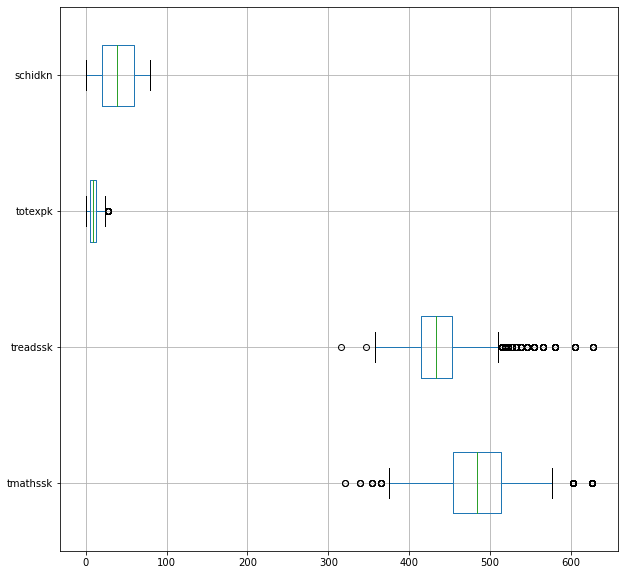

In [7]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_filtered=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

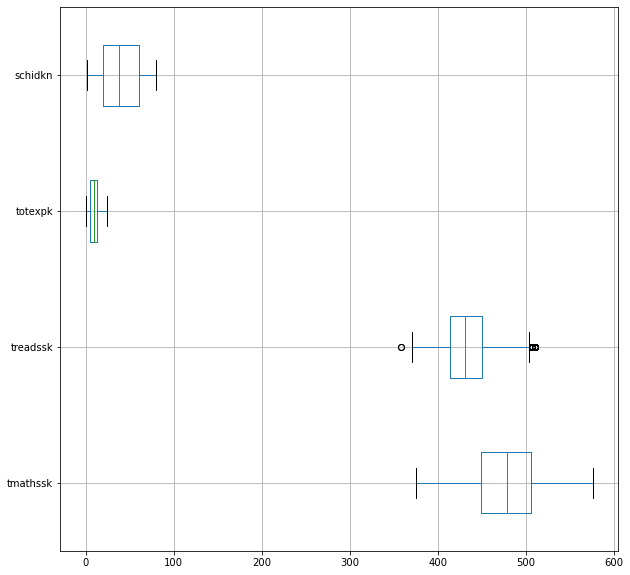

In [10]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df_filtered.boxplot(vert=0)
plt.show()

**Seems like there are still some outliers left,try to treat these outliers**

**Make Histograms, Scatter plots and Distribution Plots**
**Write inferences on all of them**

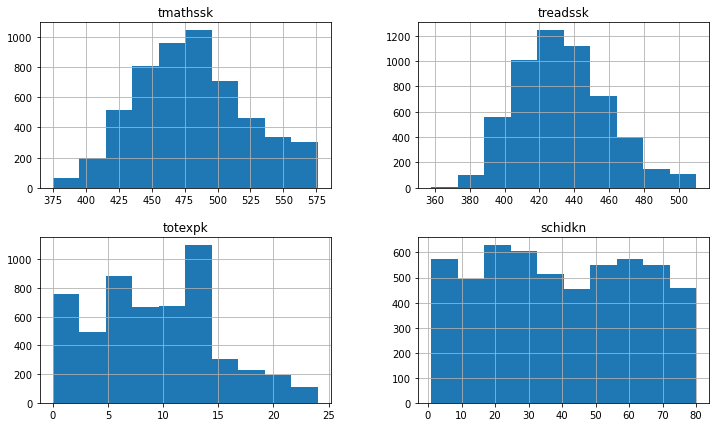

In [11]:
cols=df.dtypes[df.dtypes!='object'].index #taking only numerical attributes
fig = plt.figure(figsize = (12,7)) #figure size
ax = fig.gca() #this function adds as many as subplots as required depending upon number of columns
df_filtered[cols].hist(ax=ax) #histogram for numerical columns where axis ax is passed 
plt.show()

**Inferences from above plots**

**Encode the data**

In [12]:
df = pd.get_dummies(df,drop_first=True)

**Split the Data**

In [15]:
x = df.drop(columns=['classk_small.class'])
y = df['classk_small.class']
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

## Naive Bayes

**Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable y and dependent feature vector $x_1$ through $x_n$**

$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$

#### Advantages:

**In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters.**

**Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.**

**GaussianNB implements the Gaussian Naive Bayes algorithm for classification**

<p>source: <a href="https://scikit-learn.org/stable/modules/naive_bayes.html">scikit-learn</a></p>

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.6811594202898551
[[1162   24]
 [ 526   13]]


## Logistic Regression

**Logistic regression is a linear model for classification rather than regression. It is also known as logit regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.**

**Note: Regularization is applied by default, which is common in machine learning but not in statistics. Another advantage of regularization is that it improves numerical stability. No regularization amounts to setting C to a very high value.**



<p>source: <a href="https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression">scikit-learn</a></p>

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.6840579710144927
[[1179    7]
 [ 538    1]]


## Decision Tree

**Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.**

**The deeper the tree, the more complex the decision rules and the fitter the model**

#### Some advantages of decision trees are:

- Simple to understand and to interpret. Trees can be visualised

- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values

- Able to handle multi-output problems

- Able to handle both numerical and categorical data

#### The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.


<p>source: <a href="https://scikit-learn.org/stable/modules/tree.html#classification">scikit-learn</a></p>

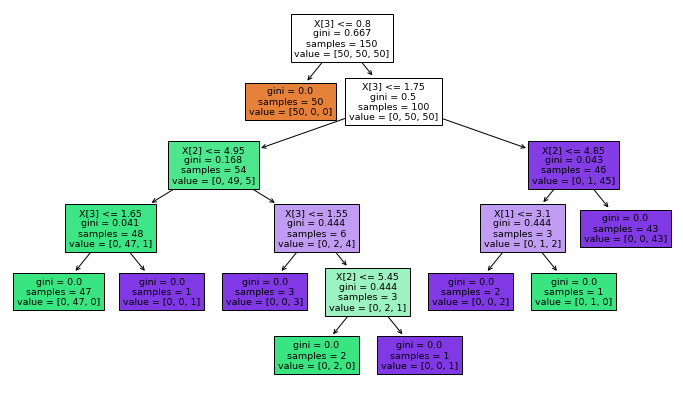

In [18]:
#Visualising Dtree in Python
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
iris=load_iris()
plt.figure(figsize=(12,7))
tree.plot_tree(clf.fit(iris.data, iris.target),filled=True) 
plt.show()

In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
model_score = clf.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.8794202898550725
[[1086  100]
 [ 108  431]]


## Ensemble: Random Forest

**In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set**

**Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size max_features**

**The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model**

**the scikit-learn implementation combines classifiers by averaging their probabilistic prediction**

<p>source: <a href="https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees">scikit-learn</a></p>

In [20]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clfRF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF.fit(x_train,y_train)

y_pred=clfRF.predict(x_test)
model_scoreRF = clfRF.score(x_test, y_test)
print(model_scoreRF)
print(metrics.confusion_matrix(y_test, y_pred))

0.7797101449275362
[[1134   52]
 [ 328  211]]


## Bagging Classifier
**A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.**

In [21]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,random_state=1) #BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)
y_predict = bgcl.predict(x_test)
print(bgcl.score(x_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.9176811594202898
[[1150   36]
 [ 106  433]]


## Linear Discriminant Analysis

**LDA can be derived from simple probabilistic models which model the class conditional distribution of the data  $P(X|y=k)$ for each class $k$.Predictions can then be obtained by using Bayes’ rule:**

$P(y=k | X) = \frac{P(X | y=k) P(y=k)}{P(X)} = \frac{P(X | y=k) P(y = k)}{ \sum_{l} P(X | y=l) \cdot P(y=l)}$
 
**and we select the class $k$ which maximizes this conditional probability.**

**More specifically, for linear discriminant analysis, $P(X|y)$ is modeled as a multivariate Gaussian distribution with density:**

$P(X | y=k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}}\exp\left(-\frac{1}{2} (X-\mu_k)^t \Sigma_k^{-1} (X-\mu_k)\right)$
 
**where $d$ is the number of features.**

<p>source: <a href="https://scikit-learn.org/stable/modules/lda_qda.html#mathematical-formulation-of-the-lda-and-qda-classifiers">scikit-learn</a></p>

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(x_train, y_train)
y_pred=clfLDA.predict(x_test)
model_scoreLDA = clfLDA.score(x_test, y_test)
print(model_scoreLDA)
print(metrics.confusion_matrix(y_test, y_pred))

0.6834782608695652
[[1177    9]
 [ 537    2]]


## Ensemble: Boosting

**The module sklearn.ensemble includes the popular boosting algorithm AdaBoost, introduced in 1995 by Freund and Schapire**

**The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.**

**The number of weak learners is controlled by the parameter n_estimators. The learning_rate parameter controls the contribution of the weak learners in the final combination. By default, weak learners are decision stumps. Different weak learners can be specified through the base_estimator parameter. The main parameters to tune to obtain good results are n_estimators and the complexity of the base estimators (e.g., its depth max_depth or minimum required number of samples to consider a split min_samples_split).**

<p>source: <a href="https://scikit-learn.org/stable/modules/ensemble.html#adaboost">scikit-learn</a></p>

In [23]:
from sklearn.ensemble import AdaBoostClassifier

clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(x_train,y_train)
y_pred=clfADB.predict(x_test)
model_scoreADB = clfADB.score(x_test, y_test)
print(model_scoreADB)
print(metrics.confusion_matrix(y_test, y_pred))

0.6823188405797102
[[1147   39]
 [ 509   30]]


## Gradient Boosting
**Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.**

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7321739130434782
[[1172   14]
 [ 448   91]]


## K-Nearest Neighbors

**Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. 
Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.**


<p>source: <a href="https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification">scikit-learn</a></p>

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train) #scaling the data since KNN is a distance based algorithm.
x_test_scaled=ss.transform(x_test)
clfKNN=KNeighborsClassifier()
clfKNN.fit(x_train_scaled,y_train)
y_pred=clfKNN.predict(x_test_scaled)
model_scoreKNN = clfKNN.score(x_test_scaled, y_test)
print(model_scoreKNN)
print(metrics.confusion_matrix(y_test, y_pred))

0.6759420289855073
[[1016  170]
 [ 389  150]]


## Cross-validation

**Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Here is a flowchart of typical cross validation workflow in model training. The best parameters can be determined by grid search techniques**


<img style="width:30%" src=attachment:image.png></img>


**When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.**

**However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.**

<p>source: <a href="https://scikit-learn.org/stable/modules/cross_validation.html">scikit-learn</a></p>
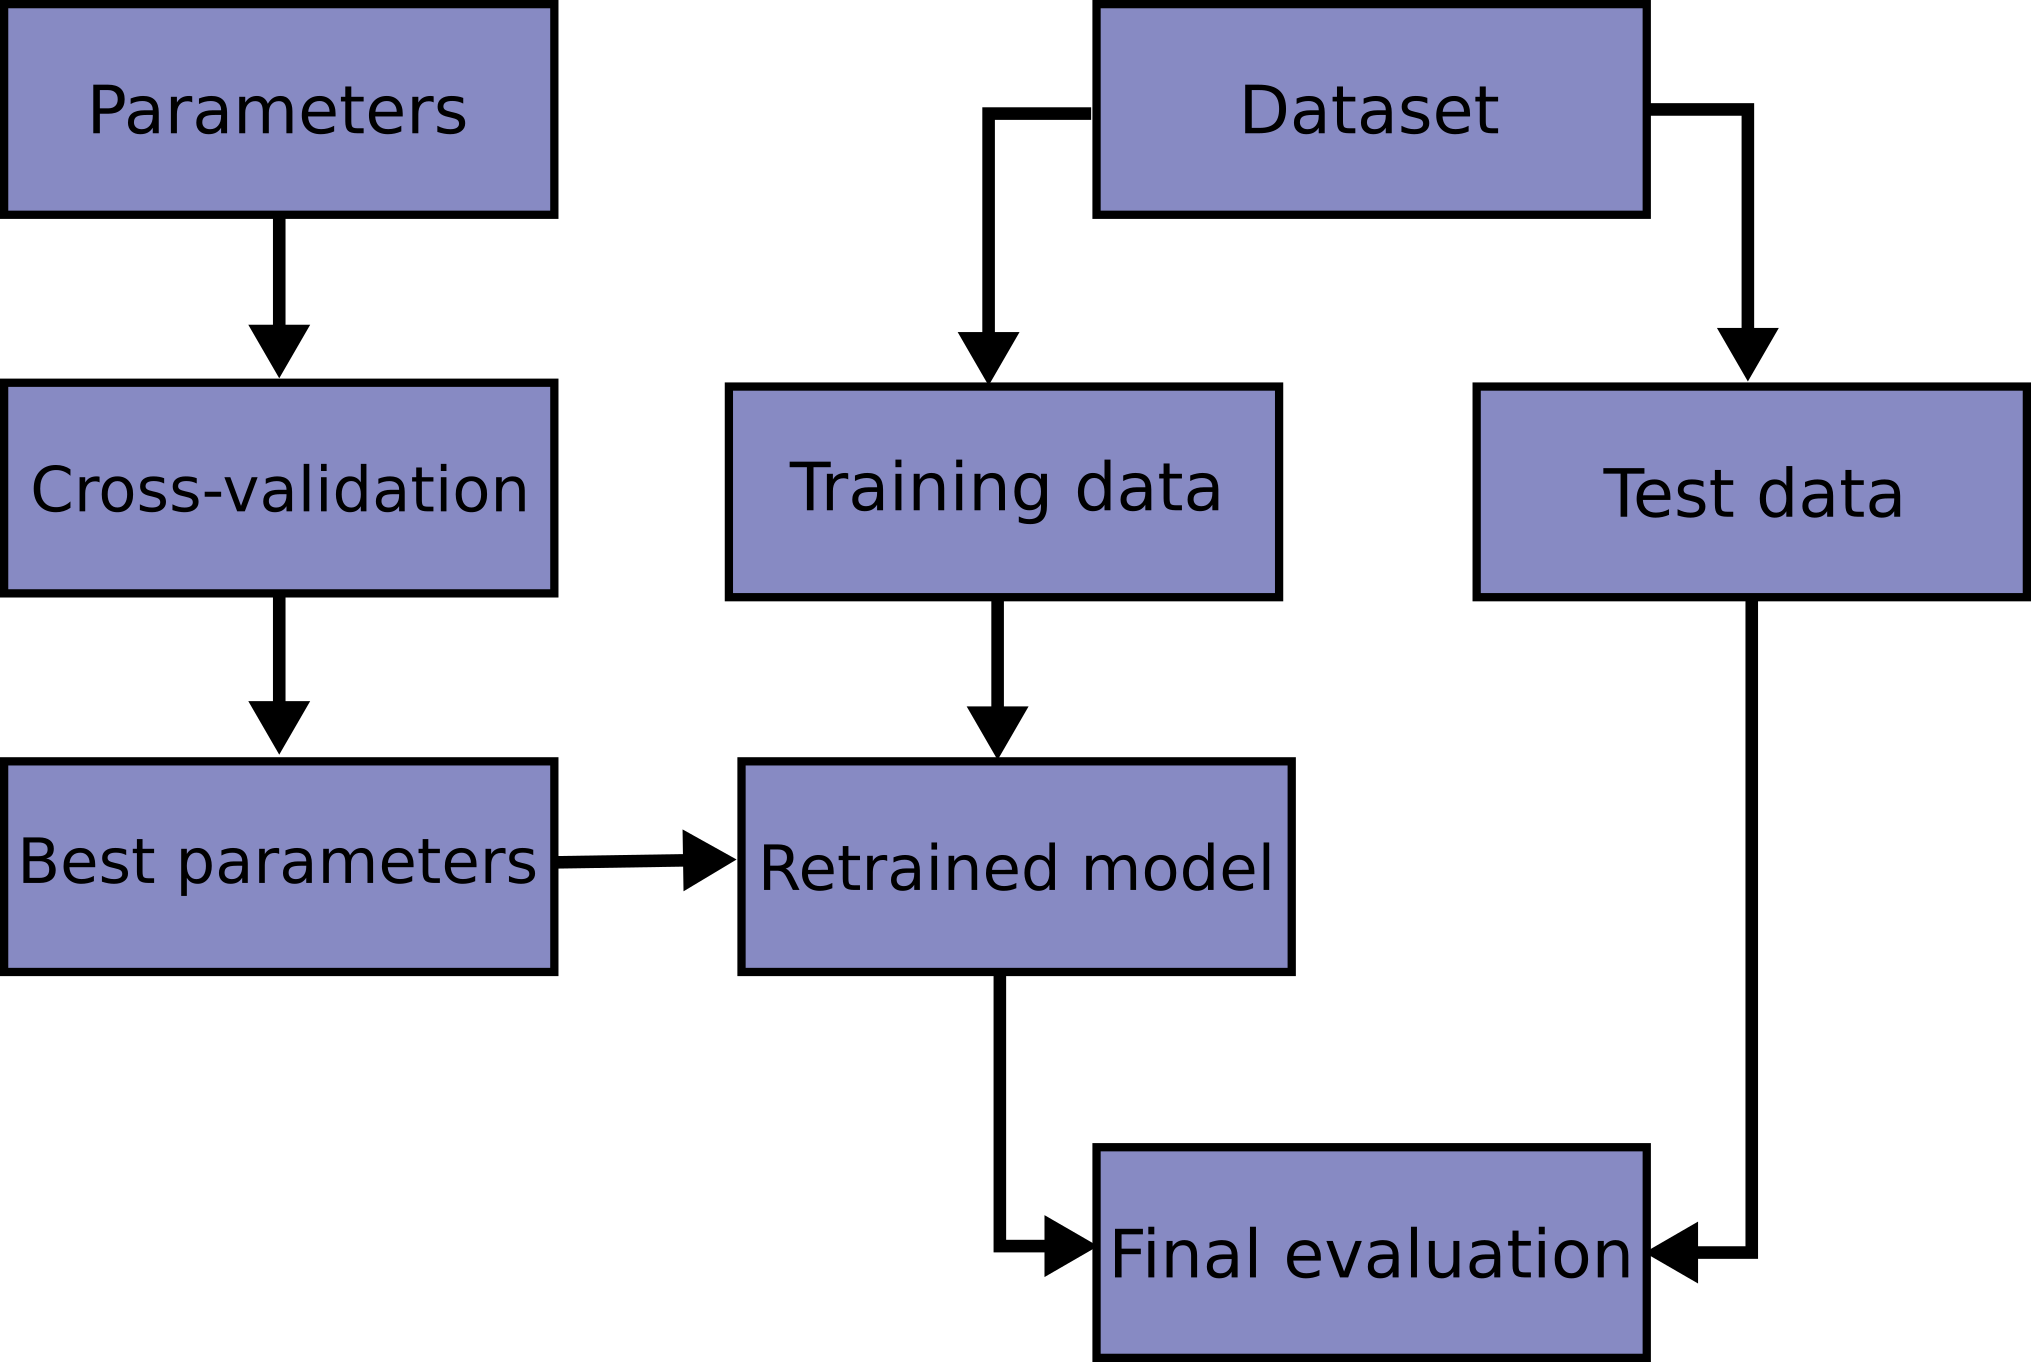

**A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:**

- **A model is trained using  of the folds as training data;**

- **the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy)**

<img style="width:50%" src=attachment:image.png></img>
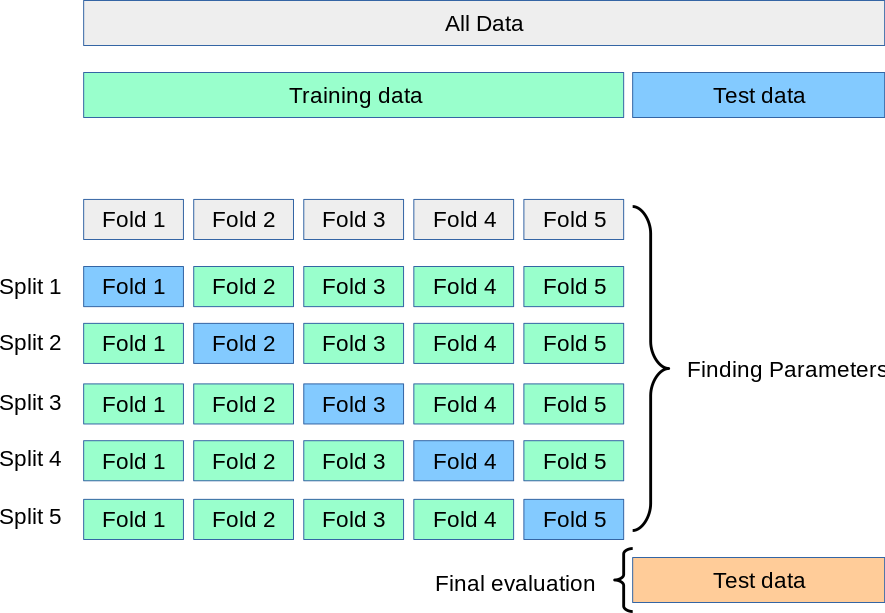

In [27]:
from sklearn.model_selection import cross_val_score
clfCVRF = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clfCVRF, x_train, y_train, cv=10)
scores

array([0.79900744, 0.79900744, 0.82382134, 0.82835821, 0.78358209,
       0.82338308, 0.79353234, 0.80348259, 0.81343284, 0.78358209])

In [28]:
np.mean(scores)

0.8051189462118687

## Now that you have made so many models, try to infer which model is the best fit for this. Also, try to tweak the model parameters and do grid_search etc to tune the models.

                                                Happy Learning!

## Support Vector Machine (Not a part of your curriculum code is given just for reference) 

**Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection**

#### The advantages of support vector machines are:

- Effective in high dimensional spaces.

- Still effective in cases where number of dimensions is greater than the number of samples.

- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

<p>source: <a href="https://scikit-learn.org/stable/modules/svm.html#classification">scikit-learn</a></p>

In [29]:
from sklearn import svm

clfSVM = svm.SVC()
clfSVM.fit(x_train, y_train)
y_pred=clfSVM.predict(x_test)
model_scoreSVM = clfSVM.score(x_test, y_test)
print(model_scoreSVM)
print(metrics.confusion_matrix(y_test, y_pred))

0.687536231884058
[[1186    0]
 [ 539    0]]


## Xtreme Gradient Boosting (Not a part of your curriculum code is given just for reference) 

**XGBoost stands for “Extreme Gradient Boosting”, where the term “Gradient Boosting” originates from the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman.**

**XGBoost algorithm was developed as a research project at the University of Washington. Tianqi Chen and Carlos Guestrin presented their paper at SIGKDD Conference in 2016 and caught the Machine Learning world by fire**

**XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way**



<p>source: <a href="https://xgboost.readthedocs.io/en/latest/tutorials/model.html">xgboost</a></p>


In [30]:
import xgboost as xgb
clfXGB=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
clfXGB.fit(x_train, y_train)
y_pred=clfXGB.predict(x_test)
model_scoreXGB=clfXGB.score(x_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred))

[13:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7715942028985507
[[1153   33]
 [ 361  178]]
